<a href="https://colab.research.google.com/github/87tana/Image-Semantic-Segmentation/blob/main/Tumor_Semantic_Segmentation_modif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setting Up Environment and Importing Required Modules

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

# Navigate to the project directory
%cd '/content/drive/MyDrive/Project_Experiments/Tumor_Semantic_Segmentation/'

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Mounted at /content/drive/
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-086fd9fdefc8>", line 6, in <cell line: 6>
    get_ipython().run_line_magic('cd', "'/content/drive/MyDrive/Project_Experiments/Tumor_Semantic_Segmentation/'")
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2418, in run_line_magic
    result = fn(*args, **kwargs)
  File "<decorator-gen-85>", line 2, in cd
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/magic.py", line 187, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/magics/osm.py", line 342, in cd
    oldcwd = os.getcwd()
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent cal

In [ ]:
# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm import tqdm
import cv2

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

# Import custom modules
from src.utils.utils import read_json, create_mask
from src.dataset.dataset import SegmentationDataset
#from src.models.resnetunet import ResNetUNet  # main model
#from src.models.resnetunet_4 import ResNetUNet_4  # model with removing 4 upsamling
#from src.models.resnet_34 import ResNet34UNet  # resenet 34, model architecture change
#from src.models.resnet_batchnorm import ResNetBatch  # batchnorm added
from src.models.resnet_50 import ResNet50UNet
from src.utils.transform import deafault_transform, augmentation
from src.train import train
from src.utils.losses import DiceLoss
from src.utils.evaluation import evaluate



# Path to dataset
root_dir = '/content/drive/MyDrive/Project_Experiments/Tumor_Semantic_Segmentation/Tumor_Segmentation'

# Read the dataset and create a dataframe
df = read_json(root_dir)

Annotation is missing for image 1380 in train


## Defining Transformations and Creating Data Loaders

### Data Loader

In [ ]:
# Create train and validation dataloaders
# Uncomment and use the train dataloader if needed

outputsize = 320

# Train dataloader
train_dataset = SegmentationDataset(root_dir=root_dir, df=df[df['subset'] == 'train'].reset_index(drop=True), subset='train', outputsize = outputsize, max_samp=224, augment=True)

# Validation dataloader
valid_dataset = SegmentationDataset(root_dir=root_dir, df=df[df['subset'] == 'valid'].reset_index(drop=True), subset='valid', outputsize = outputsize, max_samp=50)


# Test dataloader
#valid_dataset = SegmentationDataset(root_dir=root_dir, df=df[df['subset'] == 'test'].reset_index(drop=True), subset='valid', outputsize=outputsize, max_samp=50)
#valid_loader = DataLoader(valid_dataset, batch_size=25, shuffle=False)


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(
train: 100%|██████████| 224/224 [03:23<00:00,  1.10it/s]
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(
valid: 100%|██████████| 50/50 [00:46<00:00,  1.07it/s]


In [ ]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=10, shuffle=False)

## Model Setting

In [ ]:
# Hyperparameters

num_epochs = 300
valid_step = 10
ckpt_step = 10
lr = 0.0001 # le-4
exp_id = 'exp_16'

#resume_ckp = 'ckp_249.pt'
resume_ckp = None


# Initialize the model, loss function, and optimizer
model = ResNet50UNet()
criterion = nn.BCEWithLogitsLoss()  # BCEWithLogitsLoss combines a Sigmoid layer and the BCELoss.
#criterion = DiceLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

# Set the device to GPU if available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


## Training

In [ ]:
train(model,
      optimizer,
      criterion,
      num_epochs,
      train_loader,
      valid_loader,
      ckpt_step,
      valid_step,
      device,
      exp_id,
      resume_ckp = resume_ckp)

OutOfMemoryError: CUDA out of memory. Tried to allocate 72.00 MiB. GPU 

In [ ]:
torch.cuda.empty_cache()

Text(0.5, 0.98, 'Training and Validation Loss Curves')

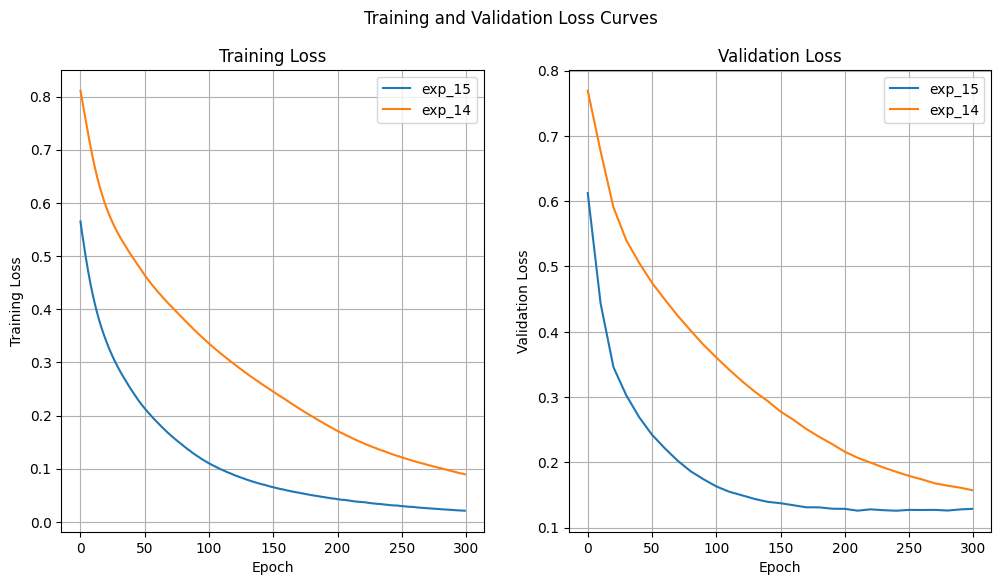

In [ ]:
"""
Plot train and validation curves
"""

exp_ids = ['exp_15','exp_14']
xlim_ = 5
ylim_ = 0.1

fig, axes = plt.subplots (1,2,figsize=(12,6))

for exp in exp_ids:

  in_path = os.path.join('Model_Checkpoints',exp,'loss_log.npy')
  loss_log = np.load(in_path, allow_pickle=True).item()
  train_loss = loss_log['train']
  valid_loss = loss_log['valid']

  axes[0].plot(np.vstack(train_loss)[:,0],np.vstack(train_loss)[:,1]) #vertically stack the array---- (train_loss) contains elements of [epoch, epoch_loss] --> 10 0utput because we have 10.
  axes[1].plot(np.vstack(valid_loss)[:,0],np.vstack(valid_loss)[:,1])




#axes[0].set_xlim(0, xlim_)
#axes[1].set_xlim(0, xlim_)
#axes[0].set_ylim(0, ylim_)
#axes[1].set_ylim(0, ylim_)

axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Training Loss')
axes[0].set_title('Training Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Validation Loss')
axes[1].set_title('Validation Loss')
axes[0].grid(True)
axes[1].grid(True)
axes[0].legend(exp_ids)
axes[1].legend(exp_ids)

fig.suptitle('Training and Validation Loss Curves')


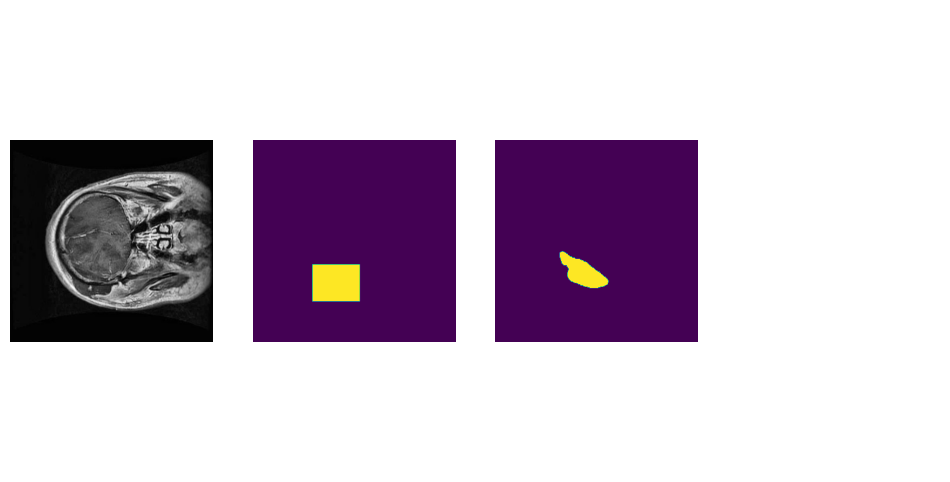

In [ ]:
"""
Visualize sample validation result.
"""

#model = ResNetUNet()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

idx= 40

experiments = ['exp_15']
ckps = ['ckp_299.pt']


img, mask, image_o, mask_o= valid_dataset.__getitem__(idx)


model = ResNetBatch().to(device)

img = img.unsqueeze(0)
img = img.to(device)

preds = []
iou_val = []
acc_val = []
dice_val = []
prec_val = []
rec_val = []

for i, exp in enumerate(experiments):
  # Load the trained model
  ckp_path = os.path.join('Model_Checkpoints',exp, ckps[i])
  checkpoint = torch.load(ckp_path)
  model.load_state_dict(checkpoint['model_state_dict'])
  model.eval()
  sigmoid = nn.Sigmoid()  # If the model does not have embedded sigmoid


  with torch.no_grad():
    pred = model(img)
  pred = pred.squeeze(0)
  pred = pred.squeeze(0)
  pred = sigmoid(pred).cpu().numpy()

  thresh=0.2
  pred[pred>thresh]=1.0
  pred[pred<=thresh]=0.0

  preds.append(pred)


  #iou_val.append(iou(mask, pred))
  #acc_val.append(accuracy(mask, pred))
  #dice_val.append(dice_coef(mask, pred))
  #prec_val.append(precision_score_(mask, pred))
  #rec_val.append(recall_score_(mask, pred))


# Plot the image, mask, and prediction
fig, axes = plt.subplots (1,4,figsize=(12,6))


#for exp in experiments:
 # print('{s} -- IoU:{:.2f}, Acc:{:.2f}, Dice:{:.2f}, Precision:{:.2f}, Recall:{:.2f}\n'.format(exp,iou_val,acc_val,dice_val,prec_val,rec_val))


axes[0].imshow(image_o)
axes[1].imshow(mask_o)
axes[2].imshow(preds[0])
#axes[3].imshow(preds[1])
#axes[4].imshow(preds[2])

for i in range(4):
  axes[i].axis('off')


In [ ]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ResNetBatch().to(device)

# Load the trained model
ckp_path = os.path.join('Model_Checkpoints','exp_15','ckp_290.pt')

iou_val,acc_val,dice_val,prec_val,rec_val = evaluate(model, ckp_path, device, valid_dataset)

print('\nIoU:{:.2f}, Acc:{:.2f}, Dice:{:.2f}, Precision:{:.2f}, Recall:{:.2f}'.format(iou_val,acc_val,dice_val,prec_val,rec_val))


100%|██████████| 50/50 [00:00<00:00, 80.69it/s]



IoU:0.33, Acc:0.97, Dice:0.42, Precision:0.52, Recall:0.46
